# Multiple Linear Regression (using sklearn) (365DS)

## Importing Libraries


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as stat

## Enhancing Visualization of Graphs

In [58]:
import seaborn as sns
sns.set()

## Importing and Displaying Dataset and it's Description

In [59]:
dataset = pd.read_csv("USA_cars_datasets.csv", index_col=0)
dataset.head(10)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.00,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.00,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.00,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.00,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.00,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561.00,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,7300,chevrolet,pk,2010,clean vehicle,149050.00,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,13350,gmc,door,2017,clean vehicle,23525.00,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,14600,chevrolet,malibu,2018,clean vehicle,9371.00,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,5250,ford,mpv,2017,clean vehicle,63418.00,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [60]:
dataset.describe(include="all")

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
count,2499.00,2499,2499,2499.00,2499,2499.00,2499,2499,2499.00,2499,2499,2499
unique,nan,28,127,nan,2,nan,49,2495,nan,44,2,47
top,nan,ford,door,nan,clean vehicle,nan,white,1gndt13s632267445,nan,pennsylvania,usa,2 days left
freq,nan,1235,651,nan,2336,nan,707,2,nan,299,2492,832
mean,18767.67,NaN,NaN,2016.71,NaN,52298.69,NaN,NaN,167691389.06,NaN,NaN,NaN
std,12116.09,NaN,NaN,3.44,NaN,59705.52,NaN,NaN,203877.21,NaN,NaN,NaN
min,0.00,NaN,NaN,1973.00,NaN,0.00,NaN,NaN,159348797.00,NaN,NaN,NaN
25%,10200.00,NaN,NaN,2016.00,NaN,21466.50,NaN,NaN,167625331.00,NaN,NaN,NaN
50%,16900.00,NaN,NaN,2018.00,NaN,35365.00,NaN,NaN,167745058.00,NaN,NaN,NaN
75%,25555.50,NaN,NaN,2019.00,NaN,63472.50,NaN,NaN,167779772.00,NaN,NaN,NaN


## Determining Variables of Interest

In [61]:
interest_data = dataset.drop(
    ['vin', 'lot','country'], 
    axis=1)
# axis=1 for columns while axis=0 for rows
interest_data.describe(include="all")

,price,brand,model,year,title_status,mileage,color,state,condition
count,2499.00,2499,2499,2499.00,2499,2499.00,2499,2499,2499
unique,nan,28,127,nan,2,nan,49,44,47
top,nan,ford,door,nan,clean vehicle,nan,white,pennsylvania,2 days left
freq,nan,1235,651,nan,2336,nan,707,299,832
mean,18767.67,NaN,NaN,2016.71,NaN,52298.69,NaN,NaN,NaN
std,12116.09,NaN,NaN,3.44,NaN,59705.52,NaN,NaN,NaN
min,0.00,NaN,NaN,1973.00,NaN,0.00,NaN,NaN,NaN
25%,10200.00,NaN,NaN,2016.00,NaN,21466.50,NaN,NaN,NaN
50%,16900.00,NaN,NaN,2018.00,NaN,35365.00,NaN,NaN,NaN
75%,25555.50,NaN,NaN,2019.00,NaN,63472.50,NaN,NaN,NaN


## Dealing with Missing Values (if any)

In [62]:
# NO missing values in the above dataset
interest_data.isnull().sum()

#  Rule Of Thumb: if you are removing just 5% of the observations,you are free to remove all that 
#  have missing values

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
condition       0
dtype: int64

In [63]:
### To drop missing values: ###
# data_no_mv = interest_data.dropna(axis=0)
# data_no_mv.describe(include="all")

## Explore the PDFs 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

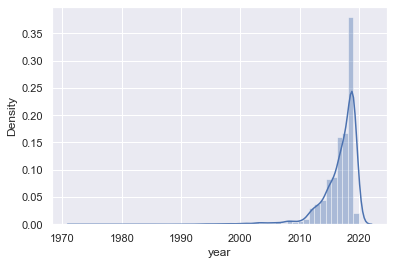

In [64]:
sns.distplot(interest_data['year'])

##  Dealing with Outliers

In [65]:
q = interest_data["price"].quantile(0.99)
data_1 = interest_data[interest_data["price"] < q]
data_1.describe(include="all")

,price,brand,model,year,title_status,mileage,color,state,condition
count,2474.00,2474,2474,2474.00,2474,2474.00,2474,2474,2474
unique,nan,28,125,nan,2,nan,49,44,47
top,nan,ford,door,nan,clean vehicle,nan,white,pennsylvania,2 days left
freq,nan,1216,649,nan,2311,nan,702,298,824
mean,18330.30,NaN,NaN,2016.70,NaN,52674.84,NaN,NaN,NaN
std,11345.98,NaN,NaN,3.45,NaN,59880.54,NaN,NaN,NaN
min,0.00,NaN,NaN,1973.00,NaN,0.00,NaN,NaN,NaN
25%,10105.00,NaN,NaN,2016.00,NaN,21844.00,NaN,NaN,NaN
50%,16800.00,NaN,NaN,2018.00,NaN,35637.50,NaN,NaN,NaN
75%,25375.00,NaN,NaN,2019.00,NaN,64143.25,NaN,NaN,NaN


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

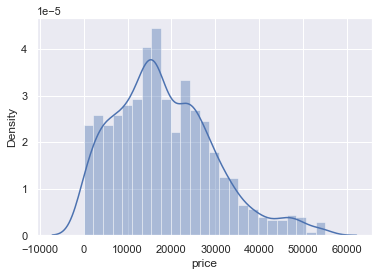

In [66]:
sns.distplot(data_1['price'])

In [67]:
q = data_1["mileage"].quantile(0.99)
data_2 = data_1[data_1["mileage"] < q]
data_2.describe(include="all")

,price,brand,model,year,title_status,mileage,color,state,condition
count,2449.00,2449,2449,2449.00,2449,2449.00,2449,2449,2449
unique,nan,27,124,nan,2,nan,49,43,47
top,nan,ford,door,nan,clean vehicle,nan,white,pennsylvania,2 days left
freq,nan,1205,638,nan,2305,nan,699,298,820
mean,18493.02,NaN,NaN,2016.81,NaN,49148.60,NaN,NaN,NaN
std,11282.29,NaN,NaN,3.24,NaN,41354.35,NaN,NaN,NaN
min,0.00,NaN,NaN,1973.00,NaN,0.00,NaN,NaN,NaN
25%,10400.00,NaN,NaN,2016.00,NaN,21703.00,NaN,NaN,NaN
50%,16900.00,NaN,NaN,2018.00,NaN,35365.00,NaN,NaN,NaN
75%,25500.00,NaN,NaN,2019.00,NaN,62224.00,NaN,NaN,NaN


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

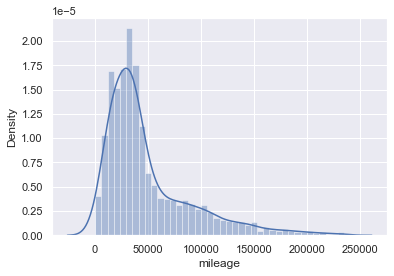

In [68]:
sns.distplot(data_2['mileage'])

In [69]:
q = data_2["year"].quantile(0.01)
data_3 = data_2[data_2["year"] > q]
data_3.describe(include="all")

,price,brand,model,year,title_status,mileage,color,state,condition
count,2422.00,2422,2422,2422.00,2422,2422.00,2422,2422,2422
unique,nan,27,123,nan,2,nan,48,43,47
top,nan,ford,door,nan,clean vehicle,nan,white,pennsylvania,2 days left
freq,nan,1192,622,nan,2298,nan,690,297,814
mean,18674.52,NaN,NaN,2017.01,NaN,48069.48,NaN,NaN,NaN
std,11194.00,NaN,NaN,2.51,NaN,39665.28,NaN,NaN,NaN
min,0.00,NaN,NaN,2004.00,NaN,0.00,NaN,NaN,NaN
25%,10500.00,NaN,NaN,2016.00,NaN,21557.50,NaN,NaN,NaN
50%,17000.00,NaN,NaN,2018.00,NaN,35176.50,NaN,NaN,NaN
75%,25500.00,NaN,NaN,2019.00,NaN,60122.25,NaN,NaN,NaN


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

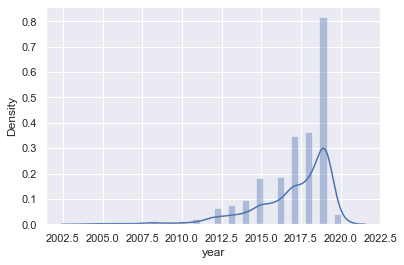

In [70]:
sns.distplot(data_3['year'])

In [71]:
data_processed = data_3.reset_index(drop=True)

In [72]:
data_processed

,price,brand,model,year,title_status,mileage,color,state,condition
0,2899,ford,se,2011,clean vehicle,190552.00,silver,tennessee,6 days left
1,5350,dodge,mpv,2018,clean vehicle,39590.00,silver,georgia,2 days left
2,25000,ford,door,2014,clean vehicle,64146.00,blue,virginia,22 hours left
3,27700,chevrolet,1500,2018,clean vehicle,6654.00,red,florida,22 hours left
4,5700,dodge,mpv,2018,clean vehicle,45561.00,white,texas,2 days left
...,...,...,...,...,...,...,...,...,...
2417,7800,nissan,versa,2019,clean vehicle,23609.00,red,california,1 days left
2418,9200,nissan,versa,2018,clean vehicle,34553.00,silver,florida,21 hours left
2419,9200,nissan,versa,2018,clean vehicle,31594.00,silver,florida,21 hours left
2420,9200,nissan,versa,2018,clean vehicle,32557.00,black,florida,2 days left


## Checking the OLS assumptions 

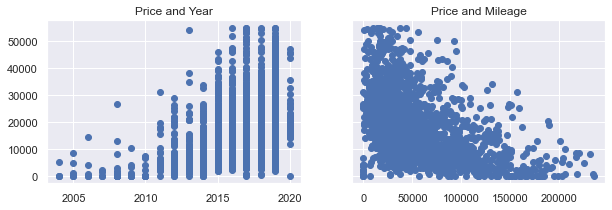

In [73]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 3))
ax1.scatter(data_processed['year'], data_processed['price'])
ax1.set_title('Price and Year')
ax2.scatter(data_processed['mileage'], data_processed['price'])
ax2.set_title('Price and Mileage')

plt.show()

## Relaxing the assumptions

In [74]:
log_price = np.log(data_processed['price'])
data_processed['log_price'] = log_price
data_processed

D:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,price,brand,model,year,title_status,mileage,color,state,condition,log_price
0,2899,ford,se,2011,clean vehicle,190552.00,silver,tennessee,6 days left,7.97
1,5350,dodge,mpv,2018,clean vehicle,39590.00,silver,georgia,2 days left,8.58
2,25000,ford,door,2014,clean vehicle,64146.00,blue,virginia,22 hours left,10.13
3,27700,chevrolet,1500,2018,clean vehicle,6654.00,red,florida,22 hours left,10.23
4,5700,dodge,mpv,2018,clean vehicle,45561.00,white,texas,2 days left,8.65
...,...,...,...,...,...,...,...,...,...,...
2417,7800,nissan,versa,2019,clean vehicle,23609.00,red,california,1 days left,8.96
2418,9200,nissan,versa,2018,clean vehicle,34553.00,silver,florida,21 hours left,9.13
2419,9200,nissan,versa,2018,clean vehicle,31594.00,silver,florida,21 hours left,9.13
2420,9200,nissan,versa,2018,clean vehicle,32557.00,black,florida,2 days left,9.13


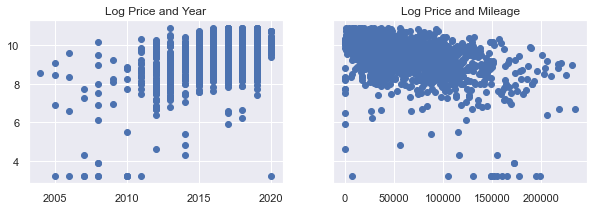

In [75]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 3))
ax1.scatter(data_processed['year'], data_processed['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_processed['mileage'], data_processed['log_price'])
ax2.set_title('Log Price and Mileage')

plt.show()

## Multicollinearity 

In [76]:
data_processed.columns.values

array(['price', 'brand', 'model', 'year', 'title_status', 'mileage',
       'color', 'state', 'condition', 'log_price'], dtype=object)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_processed[['mileage', 'year']]
vif = pd.DataFrame()
vif['Vif'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [78]:
vif # Note: 1 < vif < 5 (indicates no multicollinearity)

,Vif,features
0,2.46,mileage
1,2.46,year


## Create Dummy Variables

In [79]:
data_with_dummies = pd.get_dummies(data_processed, drop_first=True)

In [80]:
data_with_dummies.head()

,price,year,mileage,log_price,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,2899,2011,190552.00,7.97,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5350,2018,39590.00,8.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25000,2014,64146.00,10.13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27700,2018,6654.00,10.23,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5700,2018,45561.00,8.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Rearrange a bit

In [81]:
data_drop_price = data_with_dummies.drop(['price'], axis=1)
data_drop_price.columns.values


array(['year', 'mileage', 'log_price', 'brand_audi', 'brand_bmw',
       'brand_buick', 'brand_cadillac', 'brand_chevrolet',
       'brand_chrysler', 'brand_dodge', 'brand_ford', 'brand_gmc',
       'brand_harley-davidson', 'brand_heartland', 'brand_honda',
       'brand_hyundai', 'brand_infiniti', 'brand_jaguar', 'brand_jeep',
       'brand_kia', 'brand_land', 'brand_lexus', 'brand_lincoln',
       'brand_maserati', 'brand_mazda', 'brand_mercedes-benz',
       'brand_nissan', 'brand_peterbilt', 'brand_ram', 'model_2500',
       'model_2500hd', 'model_300', 'model_3500', 'model_5',
       'model_acadia', 'model_altima', 'model_armada', 'model_bus',
       'model_cab', 'model_camaro', 'model_caravan', 'model_cargo',
       'model_challenger', 'model_charger', 'model_chassis',
       'model_cherokee', 'model_colorado', 'model_compass',
       'model_connect', 'model_corvette', 'model_country', 'model_coupe',
       'model_cruze', 'model_cutaway', 'model_cx-3', 'model_d',
       'model_da

In [82]:
mid = data_drop_price['log_price']
data_drop_price.drop(labels=['log_price'], axis=1, inplace = True)
data_drop_price.insert(0, 'log_price', mid)
data_preprocessed = data_drop_price

In [83]:
# data_preprocessed = data_preprocessed.reset_index()
data_preprocessed

,log_price,year,mileage,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,7.97,2011,190552.00,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,8.58,2018,39590.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10.13,2014,64146.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.23,2018,6654.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.65,2018,45561.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,8.96,2019,23609.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2418,9.13,2018,34553.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2419,9.13,2018,31594.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2420,9.13,2018,32557.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear Regression Model

### Declare the inputs and targets

In [84]:
targets = data_preprocessed['log_price']
# np.where(targets.values >= np.finfo(np.float64).max)
# np.nan_to_num(targets)
# pd.DataFrame(targets).fillna(5)
# (targets < 0).any().any()
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale the data

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [86]:
scaled_inputs = scaler.transform(inputs)
# np.any(np.isnan(scaled_inputs))
# np.where(targets.values >= np.finfo(np.float64).max)
# np.all(np.isfinite(scaled_inputs))
# scaled_inputs = scaled_inputs[~np.isnan(scaled_inputs)]

### Train Test Split

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=365)
# np.any(np.isnan(X_train))
# print(y_train)
# np.nan_to_num(y_train)
# np.all(np.isfinite(y_train))
y_train = np.ma.masked_array(y_train, ~np.isfinite(y_train)).filled(7.0123421)
# print(X_train)
print(y_train)
# y_train = y_train.fillna(y_train.mean())

[8.70946508 9.59560277 9.82552601 ... 8.59044365 9.8469172  8.41183268]


### Create the Regression

In [88]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [89]:
y_hat = reg.predict(X_train)

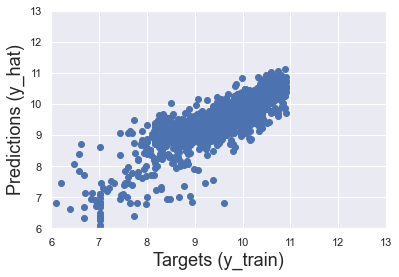

In [90]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

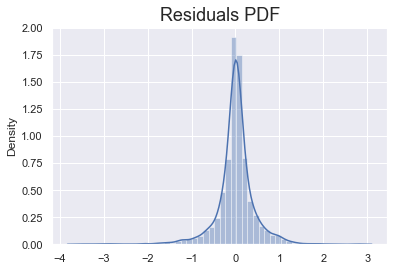

In [91]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [92]:
reg.score(X_train, y_train)

0.767245362634974

### Finding weights and bias

In [93]:
reg.intercept_

61894337046.05645

In [94]:
reg.coef_

array([ 2.56835584e-01, -1.39568057e-01, -1.28166931e-01,  1.28213663e-02,
       -1.76438190e-05,  1.45414768e-02, -9.88675421e-02, -8.89376708e-02,
       -9.17157621e-02, -3.70831154e-02, -3.23253771e-02, -2.44355189e+12,
        1.93561402e+12, -3.05285557e-02, -7.14166170e-02,  1.87661848e-02,
       -3.48137308e-02, -3.42308569e-02, -7.05394754e-02,  2.75274676e-03,
        5.14590955e-03,  2.55250692e+12, -6.99431357e+10, -1.11091398e-02,
        1.25549086e-02, -1.71538634e-01, -6.13395697e+12, -1.08853739e-02,
        9.79462780e-03,  5.27640193e-03,  1.91270699e-02,  1.36985786e-02,
        6.51214154e-02, -3.32641602e-03, -6.57348633e-02,  7.01904297e-03,
       -1.28784180e-02,  3.11279297e-03, -1.83715820e-02, -1.46545410e-01,
       -1.73034668e-02, -4.13360596e-02, -5.79833984e-02, -1.92260742e-03,
       -1.42211914e-02, -3.14941406e-02, -2.94189453e-02, -1.90505981e-02,
        7.62939453e-03, -1.22494930e+12, -1.87988281e-02, -4.16564941e-02,
       -1.38549805e-02, -

In [95]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,year,0.26
1,mileage,-0.14
2,brand_audi,-0.13
3,brand_bmw,0.01
4,brand_buick,-0.00
5,brand_cadillac,0.01
6,brand_chevrolet,-0.10
7,brand_chrysler,-0.09
8,brand_dodge,-0.09
9,brand_ford,-0.04


In [96]:
dataset['brand'].unique()

array(['toyota', 'ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'kia',
       'buick', 'infiniti', 'mercedes-benz', 'jeep', 'bmw', 'cadillac',
       'hyundai', 'mazda', 'honda', 'heartland', 'jaguar', 'acura',
       'harley-davidson', 'audi', 'lincoln', 'lexus', 'nissan', 'land',
       'maserati', 'peterbilt', 'ram'], dtype=object)

## Testing

In [97]:
y_hat_test = reg.predict(X_test)

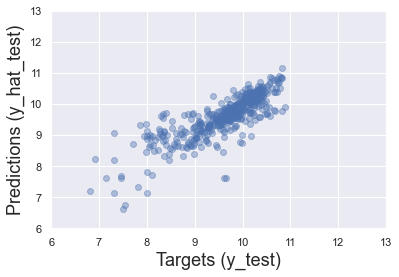

In [98]:
plt.scatter(y_test, y_hat_test, alpha=0.4)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [99]:
predicted_prices = np.exp(y_hat_test)
df_pv = pd.DataFrame(predicted_prices, columns=['Prediction'])
df_pv.head()

<ipython-input-99-276e364897a7>:1: RuntimeWarning: overflow encountered in exp
  predicted_prices = np.exp(y_hat_test)


,Prediction
0,15789.60
1,8318.63
2,17479.36
3,24781.84
4,35013.65


In [100]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.62
1    8.28
2    9.84
3   10.32
4   10.29
Name: log_price, dtype: float64

In [101]:
df_pv['Target'] = np.exp(y_test)
df_pv

,Prediction,Target
0,15789.60,15110.00
1,8318.63,3960.00
2,17479.36,18800.00
3,24781.84,30200.00
4,35013.65,29500.00
5,8341.89,6200.00
6,20290.96,20700.00
7,9228.28,4290.00
8,16710.64,18900.00
9,4395.33,4730.00


In [102]:
df_pv['Residual'] = df_pv['Target'] - df_pv['Prediction']
df_pv['Difference(%)'] = abs((df_pv['Residual']/df_pv['Target']) * 100)
df_pv

,Prediction,Target,Residual,Difference(%)
0,15789.60,15110.00,-679.60,4.50
1,8318.63,3960.00,-4358.63,110.07
2,17479.36,18800.00,1320.64,7.02
3,24781.84,30200.00,5418.16,17.94
4,35013.65,29500.00,-5513.65,18.69
5,8341.89,6200.00,-2141.89,34.55
6,20290.96,20700.00,409.04,1.98
7,9228.28,4290.00,-4938.28,115.11
8,16710.64,18900.00,2189.36,11.58
9,4395.33,4730.00,334.67,7.08


In [103]:
df_pv.describe()

,Prediction,Target,Residual,Difference(%)
count,485.00,485.00,485.00,485.00
mean,inf,18274.29,-inf,inf
std,nan,11170.75,nan,nan
min,0.00,0.00,-inf,0.06
25%,10016.67,9800.00,-2668.12,7.65
50%,15461.53,16600.00,25.41,16.73
75%,24547.00,25500.00,2639.76,38.44
max,inf,54680.00,54680.00,inf


In [104]:
df_pv.sort_values(by=['Difference(%)'])

,Prediction,Target,Residual,Difference(%)
106,15990.84,16000.00,9.16,0.06
391,26583.59,26602.00,18.41,0.07
34,28474.59,28500.00,25.41,0.09
25,27871.05,27900.00,28.95,0.10
94,29975.28,29900.00,-75.28,0.25
352,24635.18,24700.00,64.82,0.26
478,5681.04,5700.00,18.96,0.33
346,15361.00,15300.00,-61.00,0.40
349,16566.56,16500.00,-66.56,0.40
303,10959.27,10900.00,-59.27,0.54


In [105]:
pd.options.display.max_rows = 500
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pv.sort_values(by=['Difference(%)'])

,Prediction,Target,Residual,Difference(%)
106,15990.84,16000.00,9.16,0.06
391,26583.59,26602.00,18.41,0.07
34,28474.59,28500.00,25.41,0.09
25,27871.05,27900.00,28.95,0.10
94,29975.28,29900.00,-75.28,0.25
352,24635.18,24700.00,64.82,0.26
478,5681.04,5700.00,18.96,0.33
346,15361.00,15300.00,-61.00,0.40
349,16566.56,16500.00,-66.56,0.40
303,10959.27,10900.00,-59.27,0.54


In [106]:
# df_pv = df_pv.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [107]:
# df_pv.sort_values(by=['Difference(%)'])

In [108]:
df_pv.describe()

,Prediction,Target,Residual,Difference(%)
count,485.00,485.00,485.00,485.00
mean,inf,18274.29,-inf,inf
std,nan,11170.75,nan,nan
min,0.00,0.00,-inf,0.06
25%,10016.67,9800.00,-2668.12,7.65
50%,15461.53,16600.00,25.41,16.73
75%,24547.00,25500.00,2639.76,38.44
max,inf,54680.00,54680.00,inf


In [109]:
q = df_pv.quantile(0.98)
df_pv = df_pv[df_pv < q]
df_pv.describe(include="all")

,Prediction,Target,Residual,Difference(%)
count,475.00,475.00,475.00,475.00
mean,17108.12,17608.95,-inf,33.31
std,9795.61,10285.15,nan,54.44
min,0.00,0.00,-inf,0.06
25%,9929.76,9500.00,-2705.17,7.56
50%,15346.01,16500.00,-59.27,16.48
75%,24225.18,24950.00,2438.17,35.67
max,49694.62,46000.00,18777.71,576.15


In [110]:
df_pv = df_pv.dropna(axis=0)

In [111]:
final_pred_cars = df_pv.sort_values(by=['Difference(%)'], ascending=True)
# final_pred_cars = df_pv.sort_index()
final_pred_cars.head(50)

,Prediction,Target,Residual,Difference(%)
106,15990.84,16000.00,9.16,0.06
391,26583.59,26602.00,18.41,0.07
34,28474.59,28500.00,25.41,0.09
25,27871.05,27900.00,28.95,0.10
94,29975.28,29900.00,-75.28,0.25
352,24635.18,24700.00,64.82,0.26
478,5681.04,5700.00,18.96,0.33
346,15361.00,15300.00,-61.00,0.40
349,16566.56,16500.00,-66.56,0.40
303,10959.27,10900.00,-59.27,0.54


## Exporting Final Predictions

In [112]:
# final_pred_cars.to_csv('final_pred_cars.csv', index=False)